차원 축소 (Dimension Reduction) 개요
========================================
차원 축소
- 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
- 학습 데이터의 크기가 줄어서 학습에 필요한 처리 능력을 줄일 수 있음

- 피처 선택(feature selection)과 피처 추출(feature extraction)
- 피처 선택 (특성 선택)
  - 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거 + 데이터의 즉징을 잘 나타내는 주요 피처만 선택
- 피처(특성) 추출
  - 기존 피처를 저차원의 중요 피처로 압축해서 추출
  - 기존의 피처와는 완전히 다른 값
  - 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것
  - 차원 축소 알고리즘에는 ... : PCA, SVD, NMF

- 차원 축소 알고리즘
  - 매우 많은 픽셀로 이뤄진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축을 수행함
  - 변환된 이미지는 분류 수행 시 과적합 영향력이 작아져서 예측 성능이 더 높아짐
  - 텍스트 문서의 숨겨진 의미 추출할 때도 이용함
  - 문서 내 단어들의 구성에 숨겨져 있는 시맨틱 의미나 토픽을 잠재요소로 간주하고 이를 찾아낼 수 있음

PCA(Principal Component Analysis)
==================================
PCA 개요
------------
PCA
- 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
- 기존 데이터의 정보 유실이 최소화됨
  - 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소함
  - 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주

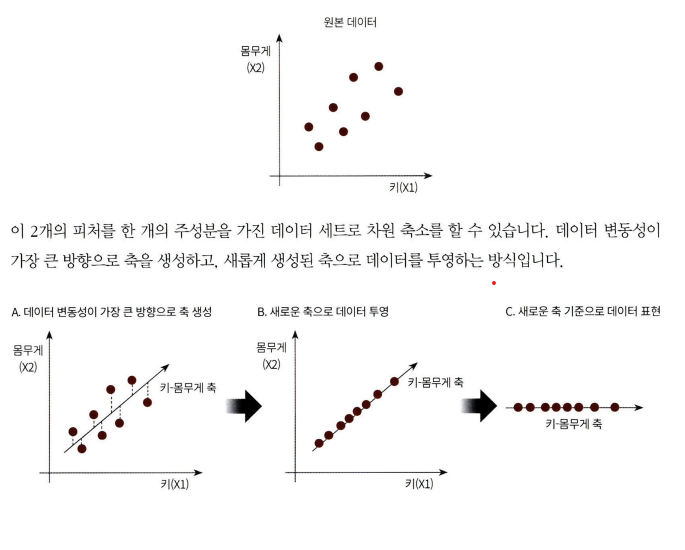



1. 가장 큰 데이터 변동성(variance)을 기반으로 첫 번째 벡터 축을 생성함
2. 두 번째 벡터 축 : 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 함
3. 세 번째 벡터 축 : 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축 설정

> 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소됨

PCA(주성분 분석) : 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법
- 선형대수 관점에서는...
  - 입력 데이터의 공분산 행렬을 고유값 분해 + 고유벡터에 입력 데이터를 선형 변환하는 것
  - 고유벡터 : PCA의 주성분 벡터, 입력 데이터의 분산이 큰 방향을 나타냄
  - 고윳값 : 고유벡터의 크기이자 입력 데이터의 분산


선형 변환 : 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것

분산 : 한 개의 특정한 변수의 데이터 변동을 의미

공분산 : 두 변수 간의 변동을 의미

고유벡터 : 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터
- 여러 개 존재
- 정방행렬 : 최대 차원수만큼의 고유벡터 보유
- 행렬이 작용하는 힘의 방향과 관계 있음 -> 행렬 분해하는 데 사용됨

공분산 행렬 : 정방행렬 / 대칭행렬
- 정방행렬 : 열과 행이 같은 행렬
- 대칭행렬 : 정방행렬 중에서 대각 원소를 중심으로 원소 값이 대칭되는 행렬 (A^T = A)
- 공분산 행렬 : 개별 분산값을 대각 원소로 하는 대칭행렬
- 항상 고유벡터를 직교행렬로, 고유값을 정방행렬로 대각화할 수 있음

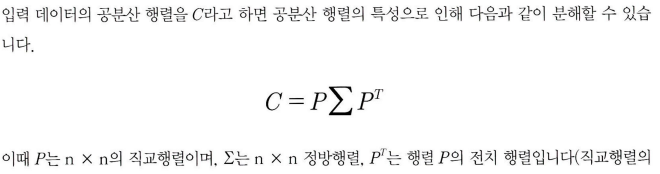

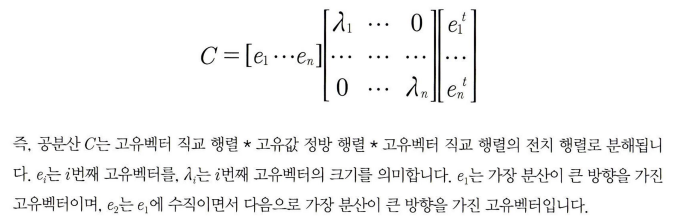

- 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해됨
- 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식 -> PCA


PCA 수행 과정
1. 입력 데이터 세트의 공분산 행렬을 생성합니다.
2. 공분산 행렬의 고유벡터와 고유값을 계산합니다.
3. 고유값이 갖아 큰 순으로 K개(PCA 변환 차수)만큼 고유벡터를 추출합니다.
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환합니다.

In [ ]:
# pg.382 : iris 데이터 세트에서 4개의 속성을 2개의 PCA차원으로 압축해 원본, 압축 데이터 비교하기

from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data = iris.data, columns = columns)
irisDF["target"] = iris.target

irisDF.head()

In [ ]:
# pg.383 : 2차원으로 시각화하기 (sepal length, sepal width를 X,Y축으로 하는 품종 데이터 분포)

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [ ]:
# pg.384 : 각 속성값을 동일한 스케일로 변환하기

# 사이킷런의 StandardScaler 이용해서 평균 0, 분산 1인 표준정규분포로 iris 데이터 세트 속성값 변환
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [ ]:
# pg.384 : 스케일링 적용된 데이터세트에 PCA 적용해서 2차원 PCA데이터로 변환하기

from sklearn.decomposition import PCA

# n_components : PCA로 변환할 차원의 수
pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

In [ ]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

In [ ]:
# pg.385 : 2개 속성으로 PCA 변환된 데이터 세트를 2차원상에서 시각화해보기

# setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

# pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- PCA 변환 후에도 X축 기반으로 Setosa 품종 명확 구분 가능
- Versicolor, Virginica 도 비교적 잘 구분됨
> PCA의 첫번째 새로운 축인 pca_component_1이 원본 데이터의 변동성을 잘 반영하고 있기 때문

In [ ]:
# pg.386 : PCA component별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 알아보기
# explained_variance_ratio_ : 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 제공함

print(pca.explained_variance_ratio_)

- 첫 번째 PCA 변환 요소 : 전체 변동성의 약 72.9% 차지
- 두 번째 PCA 변환 요소 : 전체 변동성의 약 22.8% 차지

> 원본 데이터의 변동성을 95% 설명가능

In [ ]:
# pg.386 : 원본 붓꽃 데이터세트와 PCA로 변환된 데이터 세트에 각각 분류 적용 + 결과 비교

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

In [ ]:
# pg.387 : PCA 변환한 데이터 세트에 랜덤 포레스트 적용하기

pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 차원 개수에 따라 원본데이터 세트 대비 예측 정확도는 예측 성능이 떨어짐

신용카드 고객 데이터 세트 이용해서 변환된 PCA 데이터에서의 예측 영향도 살펴보기

In [ ]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel('/content/sample_data/credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

30000개의 레코드, 24개의 속성

In [ ]:
# pg.389 : 데이터 전처리

df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

In [ ]:
# pg,389 : corr() 로 각 속성 간의 상관도 구하기 + heatmap으로 시각화하기

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

BILL_AMT1 ~ BILL_AMT6 상관도 : 대부분 0.9이상으로 매우 높음
- 소수의 PCA만으로도 자연스럽게 속성들의 변동성 수용가능

In [ ]:
# pg,390 : 6개 속성을 2개의 컴포넌트로 PCA 변환한 뒤 개별 컴포넌트의 변동성 알아보기

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
cols_pay = ['PAY_' + str(i) for i in range(1, 7)]
cols_amt = ['PAY_AMT' + str(i) for i in range(1, 7)]
print(cols_bill)
cols_bill.extend(cols_pay)
cols_bill.extend(cols_amt)
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
X_features.loc[:, cols_bill] = df_cols_scaled
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명가능


In [ ]:
# pg.391 : 원본 데이터 세트에 랜덤포레스트 이용해서 타깃값이 디폴트값을 3개의 교차검증세트로 분류 예측하기

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

3개의 교차 검증 세트에서 평균 예측 정확도 : 81.71%

In [ ]:
# pg.392 : 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대해 동일하게 분류 예측 적용하기

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

LDA(Linear Discriminant Analysis)
=======================================
LDA 개요
-----------
LDA (선형 판별 분석법)
- 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소함

PCA와 공통점
- 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소함

PCA와 차이점
- PCA : 입력 데이터의 변동성의 가장 큰 축을 찾음
- LDA : 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음 -> 클래스 간 분산, 클래스 내부 분산의 비율을 최대화하는 방식으로 차원축소

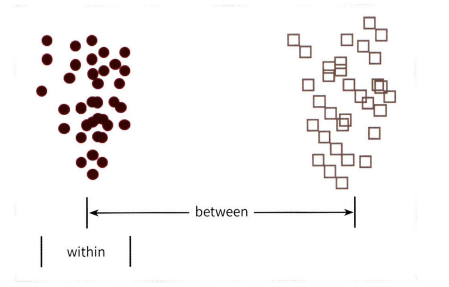

LDA 수행 스텝
1. 클래스 내부와 클래스 간 분산 행렬을 구합니다. 이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터를 기반으로 구합니다.
2. 클래스 내부 분산 행렬을 Sw, 클래스 간 분산 행렬을 Sh라고 하면 다음 식으로 두 행렬을 고유벡터로 분해할 수 있습니다.

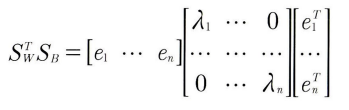

3. 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출합니다.
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환합니다.

In [ ]:
# pg.394 : 붓꽃 데이터 세트 불러오기

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [ ]:
# pg.394 : 2개의 컴포넌트로 붓꽃 데이터를 LDA 변환하기

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target) # LDA는 지도학습이므로 클래스 결정값이 입력됨
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

In [ ]:
# pg.395 : LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현하기

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()